## 机器学习
- 有监督学习
    - 回归（连续性变量）
    - 分类（离散型变量）
- 无监督学习

In [1]:
# 引入相关的计算包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
### 1.1 回归
使用sklearn内置数据集Boston房价数据集

In [3]:
from sklearn import datasets
boston=datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
boston_data=pd.DataFrame(x, columns=features)
boston_data["Price"]=y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


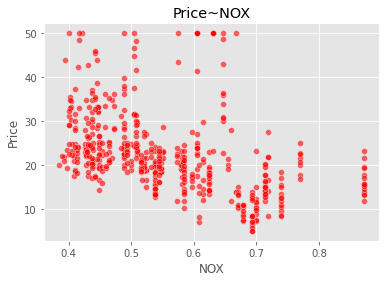

In [4]:
sns.scatterplot(boston_data['NOX'],boston_data['Price'],color="r",alpha=0.6)
plt.title("Price~NOX")
plt.show()

我们可以看到，数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。
各个特征的相关解释：
- CRIM：各城镇的人均犯罪率
- ZN：规划地段超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售商业用地比例
- CHAS：是否在查尔斯河边(=1是)
- NOX：一氧化氮浓度(/千万分之一)
- RM：每个住宅的平均房间数
- AGE：1940年以前建造的自住房屋的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：放射状公路的可达性指数
- TAX：全部价值的房产税率(每1万美元)
- PTRATIO：按城镇分配的学生与教师比例
- B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
- LSTAT：较低地位人口
- Price：房价

### 1.2 分类
以iris数据集为例：

In [5]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
features = iris.feature_names
iris_data=pd.DataFrame(x, columns=[features])
iris_data['target']=y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


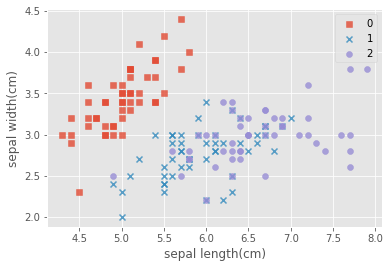

In [6]:
# 可视化特征
marker=['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],
    y=iris_data.loc[y==c,"sepal width (cm)"],
    alpha=0.8,label=c,marker=marker[c]) # alpha:透明度;
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.legend()
plt.show()

各个特征的相关解释：

- sepal length (cm)：花萼长度(厘米)
- sepal width (cm)：花萼宽度(厘米)
- petal length (cm)：花瓣长度(厘米)
- petal width (cm)：花瓣宽度(厘米)

### 1.3 无监督学习

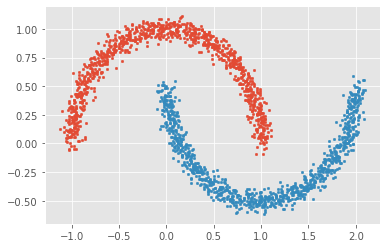

In [7]:
# 生成月牙型非凸集
from sklearn import datasets
x,y=datasets.make_moons(n_samples=2000,shuffle=True,noise=0.05,random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6) # s:点的大小
plt.show()

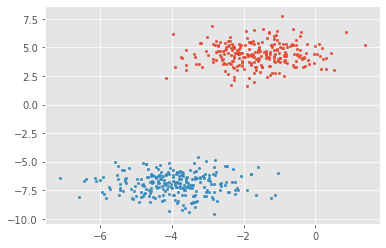

In [25]:
# 生成符合正太分布的聚类数据
from sklearn import datasets
from sklearn.utils.validation import _num_samples
x,y=datasets.make_blobs(n_samples=500,n_features=3,centers=2,random_state=True)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6)
plt.show()

## 2.使用sklearn构建完整的机器学习项目流程
一般来说，一个完整的机器学习项目分为以下步骤：
- 明确项目任务：分类/回归
- 收集数据集并选择合适的特征
- 选择度量模型性能的指标
- 选择具体的模型并进行训练以优化模型
- 评估模型的性能并调参

### 2.1 使用sklearn构建完整的回归项目
#### 收集数据集并选择合适的特征
以Boston房价数据集为例：